# Classificação!
## Alan Silva Furquim - 200049 / Vitor Augusto de LIma Soares 200327

Esse notebook contém todas as funções necessária para realizar a **classificação** no em um dataframe com dados de **funcionários**, apresentando as seguintes informações:
- **Education**: As qualificações educacionais dos funcionários.

- **Joining Year**: O ano em que o funcionário ingressou na empresa.

- **City**: O local ou cidade em que cada funcionário reside ou trabalha.

- **Payment Tier**: Categorização dos salários de cada funcionário(1>3).

- **Age**: A idade de cada funcionário.

- **Gender**: Gênero dos funcionários.

- **Ever Benched**: Indica se um funcionário ja ficou um tempo sem trabalhar com carteira assinada.

- **Experience in Current Domain**: Os anos de experiência de cada funcionário em sua respectiva área.

- **Leave or Not**: A coluna target.

O objetivo do projeto é verificar a chance de um funcionario sair ou não do trabalh, utilizando 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import sklearn.tree as SKTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import numpy as np
import random
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

### 1 Etapa:
- Leitura dos dados
- Validação das colunas e seus valores
- Definindo a coluna target e as colunas desncessárias para a analise

In [2]:
# Lendo o arquivo classification_employee com os dados dos funcionarios
df_employee = pd.read_csv('classification_employee.csv')
df_employee.shape

In [4]:
print('Total de valores por coluna:')

#Loop pelas colunas do df com os dados do funcionario
for coluna in df_employee:

    #Removendo os valores duplicados das colunas do df, mantendo apenas os valores unicos
    unicos = df_employee[coluna].unique()

    #Quantidade de valores unicos dentro de cada coluna
    valores = len(unicos)

    #Apresentando os dados para melhor compreensão
    print(f"    -{coluna}: {valores}->{unicos}")


Total de valores por coluna:
    -Education: 3->['Bachelors' 'Masters' 'PHD']
    -JoiningYear: 7->[2017 2013 2014 2016 2015 2012 2018]
    -City: 3->['Bangalore' 'Pune' 'New Delhi']
    -PaymentTier: 3->[3 1 2]
    -Age: 20->[34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
    -Gender: 2->['Male' 'Female']
    -EverBenched: 2->['No' 'Yes']
    -ExperienceInCurrentDomain: 8->[0 3 2 5 1 4 7 6]
    -LeaveOrNot: 2->[0 1]


In [5]:
#Visualizando as primeiras 5 linhas do df, para saber o tipo de dado de cada coluna
df_employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [6]:
# Aprofundando a investigação nas colunas numericas do df
df_employee.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [7]:
#Detalhando o tipo de valor de cada coluna
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


-------------------------------------

# EDA (Exploratory Data Anlysis)

- Tecnina comumente utilizada para 
- Supor a historia dos dados
- Maximizar insights a partir dos dados
- detectar outliers
- extrair features

In [8]:
# Quantidade de ocorrencia que cada valor da coluna LeaveOrNot 
print('Classes e quantidade:', Counter(df_employee['LeaveOrNot']))

Classes e quantidade: Counter({0: 3053, 1: 1600})


### BoxPlot:
Representação gráfica que mostra a distribuição de um conjunto de dados

O gráfico é composto por:
- Caixa: representa o intervalo interquartil 
- Linha interior: mediana dos dados
- whiskers: valores maximos e minimos dentro de uma certa distância dos quartis (outliers)

<Axes: >

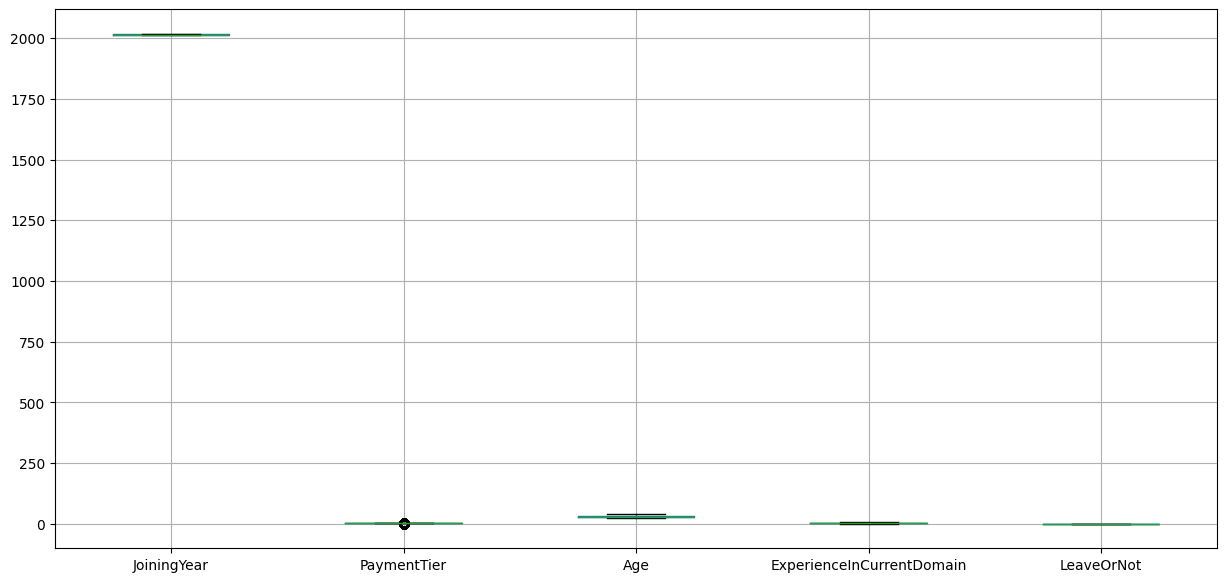

In [9]:
df_employee.boxplot(figsize=(15,7))

### Pairplot

Cria um conjunto de gráficos de dispersão para explorar as relações entre variáveis no df. Cada ponto nos gráfocps representa uma observação nos dados, e os pontos são coloridos de acordo com os valores na coluna

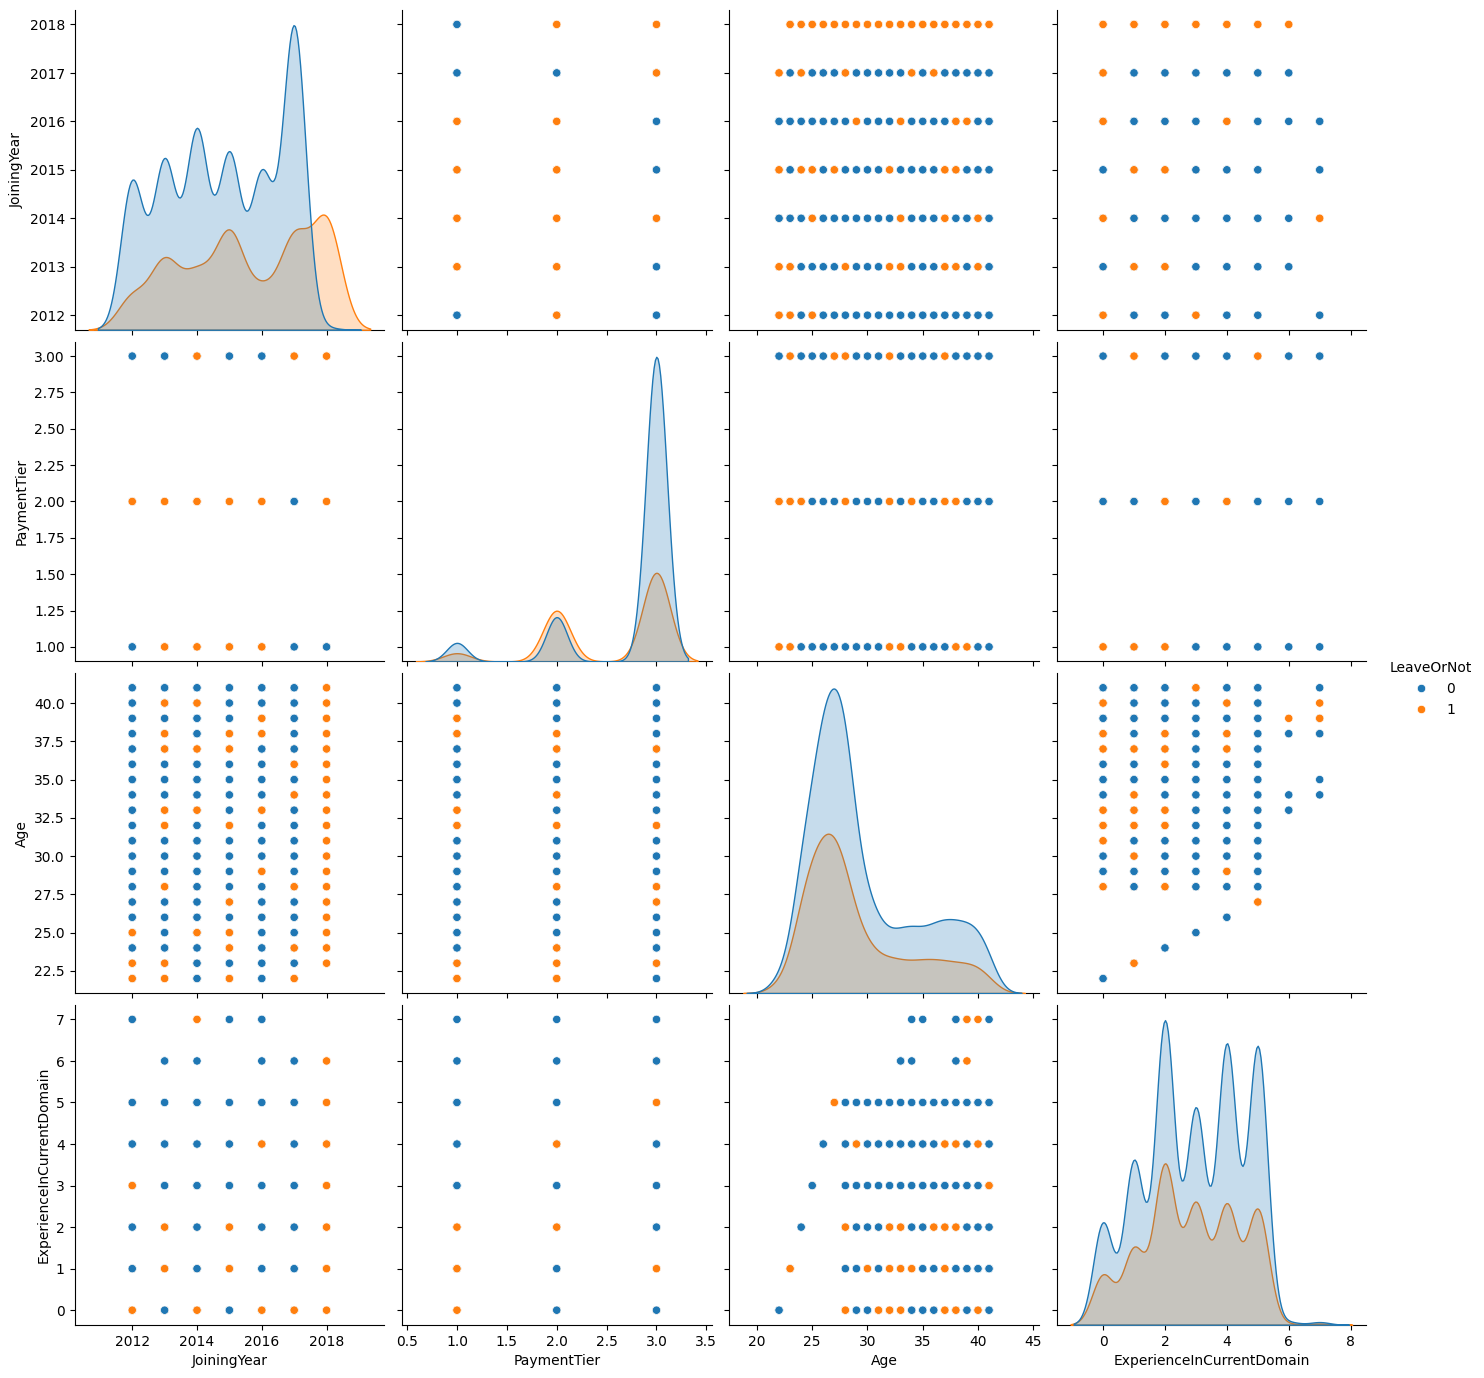

In [10]:
sns.pairplot(df_employee, hue='LeaveOrNot', height=3.5)
plt.show()

### Matriz de Correlação

Tabela que indica os coeficientes de conexão entre os fatores, utilizada para delinear informações, como contribuição para uma investigação mais desenvolvida.

A anlise de correlação vai retornar 3 possiveis cenários
- Correlação positiva: as duas variaveis crescem e decrescem juntas, ou seja uma relação direta
- Correlação negativa: quando uma das variaveis cresce e a outra decrsce
- Não ter correlação: quando o crescimento e decrescimento de uma variavel não tem efeito sobre a outra

* ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
* ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
* ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
* ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
* ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.




Matriz de correlação: 


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


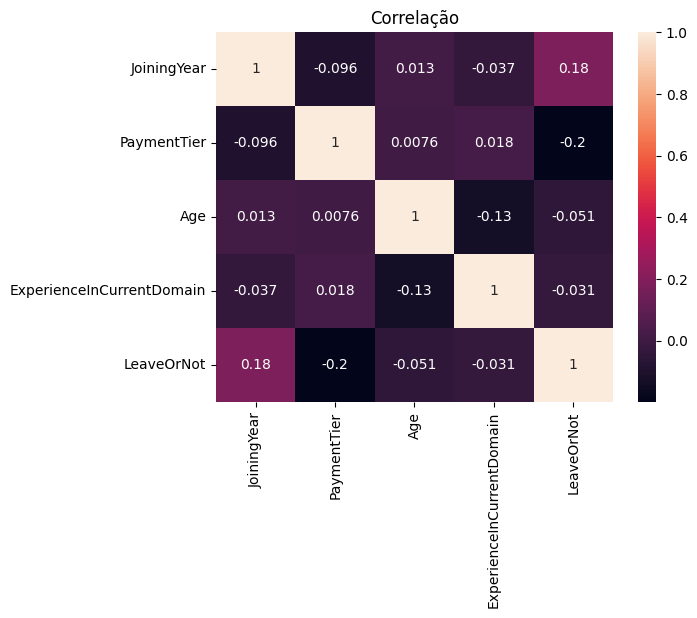

In [11]:
#Calcula a matriz de correlação para as variaveis numéricas no df, criando uma tabela de correlação
df_correlation = df_employee.corr()

#Exibe a tabela de correlação 
print('\n\nMatriz de correlação: ')
display(df_correlation)

#Cria um mapa de calor para visualizar a matrix de correlação
sns.heatmap(df_correlation,
            annot=True,
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns)

plt.title('Correlação')
plt.show()

-------------------------------------

# Feature Engineering ou Pré - Processamento de Dados

- Tem como objetivo desenvolver um bom modelo de aprendizado de máquina
- Transformações matematicas em features existentes, para extrair o máximo potencial dos dados

## Education

In [12]:
# Criando um df que mostra a média dos valores na coluna "LeaveOrNot" para cada categoria unica presente na coluna "Education"
df_employee[['Education', 'LeaveOrNot']].groupby(['Education'], as_index=False).mean()

,Education,LeaveOrNot
0,Bachelors,0.313524
1,Masters,0.487973
2,PHD,0.251397


In [13]:
# Cria uma tabela que mostra a contavem de observações para cada combinação de níveis de 'Education' e 'LeaveOrNot'

# Neste caso, 'LeaveOrNot' representa duas categorias (0 e 1), 'Education' representa três categorias (Bachelors, Masters, PHD)
# e os números reais representam a contagem de observações em cada categoria.
# A última linha e a última coluna mostram as somas marginais para 'LeaveOrNot' e 'Education', respectivamente.

pd.crosstab(df_employee.Education, df_employee.LeaveOrNot, margins=True)

LeaveOrNot,0,1,All
Education,,,
Bachelors,2472,1129,3601
Masters,447,426,873
PHD,134,45,179
All,3053,1600,4653


## JoiningYear

In [14]:
# Preenche os valores nulos na coluna 'JoiningYear' com a mediana dos valores não nulos.
df_employee['JoiningYear'] = df_employee['JoiningYear'].fillna(df_employee['JoiningYear'].median())

# Divide a coluna 'JoiningYear' em 6 intervalos (quantis) e atribui rótulos a cada intervalo de 2013 a 2018.
df_employee['YearGroup'] = pd.qcut(df_employee['JoiningYear'], 6, labels=range(2013, 2019))

# Calcula a média da coluna 'LeaveOrNot' para cada categoria única na coluna 'YearGroup'.
# Realiza o agrupamento por 'YearGroup' e calcula a média dos valores da coluna 'LeaveOrNot' para cada grupo.
# Mantém 'YearGroup' como uma coluna no DataFrame resultante.
df_yearly_leave_rate = df_employee[['YearGroup', 'LeaveOrNot']].groupby(['YearGroup'], as_index=False).mean()


,YearGroup,LeaveOrNot
0,2013,0.283887
1,2014,0.247496
2,2015,0.407170
3,2016,0.222857
4,2017,0.268051
5,2018,0.986376


## City

In [15]:
# Cria uma tabela de contingência (crosstab) para as colunas 'City' e 'LeaveOrNot' do DataFrame df_employee.
# As linhas representam os diferentes valores na coluna 'City', as colunas representam os valores em 'LeaveOrNot'.
# O parâmetro margins=True adiciona uma linha e uma coluna com as somas marginais.
contingency_table = pd.crosstab(df_employee.City, df_employee.LeaveOrNot, margins=True)


LeaveOrNot,0,1,All
City,,,
Bangalore,1633,595,2228
New Delhi,791,366,1157
Pune,629,639,1268
All,3053,1600,4653


## Payment Tier

In [16]:
# Cria uma tabela de contingência (crosstab) para as colunas 'PaymentTier' e 'LeaveOrNot' do DataFrame df_employee.
# As linhas representam os diferentes valores na coluna 'PaymentTier', as colunas representam os valores em 'LeaveOrNot'.
# O parâmetro margins=True adiciona uma linha e uma coluna com as somas marginais.
payment_tier_table = pd.crosstab(df_employee.PaymentTier, df_employee.LeaveOrNot, margins=True)


LeaveOrNot,0,1,All
PaymentTier,,,
1,154,89,243
2,368,550,918
3,2531,961,3492
All,3053,1600,4653


## Age

In [17]:
print('Oldest person is', df_employee['Age'].max(), 'Years')
print('Youngest person is', df_employee['Age'].min(), 'Years')
print('Average Age is', int(df_employee['Age'].mean()), 'Years')

Oldest person is 41 Years
Youngest person is 22 Years
Average Age is 29 Years


In [18]:
# Agrupa o DataFrame df_employee pela coluna 'Education'.
# Para cada grupo de 'Education', calcula a média e a contagem da coluna 'Age'.
# O resultado é um DataFrame com as médias e contagens agrupadas por 'Education'.
education_stats = df_employee.groupby('Education').agg({'Age': ['mean', 'count']})


Age      
                mean count
Education                 
Bachelors  29.422938  3601
Masters    29.290951   873
PHD        29.296089   179

## Gender

In [19]:
# Cria uma tabela de contingência (crosstab) para as colunas 'Gender' e 'LeaveOrNot' do DataFrame df_employee.
# As linhas representam os diferentes valores na coluna 'Gender', as colunas representam os valores em 'LeaveOrNot'.
# O parâmetro margins=True adiciona uma linha e uma coluna com as somas marginais.
gender_leave_table = pd.crosstab(df_employee.Gender, df_employee.LeaveOrNot, margins=True)


LeaveOrNot,0,1,All
Gender,,,
Female,991,884,1875
Male,2062,716,2778
All,3053,1600,4653


-------------------------------------
## Tratamento dos dados

In [20]:
# Cria uma nova variável 'treated_df' e atribui a ela o mesmo DataFrame 'df_employee'.
treated_df = df_employee

# Mapeia os valores na coluna 'Gender' de 'treated_df' para 0 (Female) e 1 (Male).
treated_df['Gender'] = treated_df.Gender.map({"Female": 0, "Male": 1})

# Cria variáveis dummy para as colunas 'Education', 'City' e 'EverBenched' de 'treated_df'.
# A função pd.get_dummies() cria colunas separadas para cada categoria, atribuindo 1 para a categoria presente e 0 para as outras.
df_dummy = pd.get_dummies(treated_df, columns=['Education', 'City', 'EverBenched'])


In [21]:
display(df_dummy.columns)
display(df_dummy.shape)

Index(['JoiningYear', 'PaymentTier', 'Age', 'Gender',
       'ExperienceInCurrentDomain', 'LeaveOrNot', 'YearGroup',
       'Education_Bachelors', 'Education_Masters', 'Education_PHD',
       'City_Bangalore', 'City_New Delhi', 'City_Pune', 'EverBenched_No',
       'EverBenched_Yes'],
      dtype='object')

(4653, 15)

## Naive Bayes

Técnica utilizada para gerar uma tabela de probabilidade a partir de uma técnica de classificação de dados

O algoritmo define, primeiramente uma tabela de probabilidade, em que consta a frequencia dos preditores com relação ás variaveis de sáida.Então o calculo final
leva em conta a probabilidade maior para oferecer uma solução

In [22]:
# Seleciona as variáveis independentes (X) e a variável dependente (y) do DataFrame df_dummy.
# X contém todas as colunas, exceto "LeaveOrNot", como variáveis independentes.
# y contém a coluna "LeaveOrNot", que é a variável dependente.
X = df_dummy.drop(columns="LeaveOrNot").values
y = df_dummy["LeaveOrNot"].values

# Divide o conjunto de dados em conjuntos de treinamento e teste (95% para treinamento e 5% para teste).
# O parâmetro random_state=42 garante que os mesmos conjuntos de dados sejam gerados sempre que o código for executado.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95, random_state=42)

# Cria um modelo Naive Bayes Gaussiano.
model = GaussianNB()

# Treina o modelo usando os dados de treinamento.
model.fit(X_train, y_train)

# Realiza previsões usando os dados de teste.
y_pred = model.predict(X_test)

# Calcula a acurácia do modelo comparando as previsões (y_pred) com os rótulos reais (y_test).
accuracy = accuracy_score(y_test, y_pred)

# Imprime a acurácia do modelo.
print(f'Acurácia: {accuracy * 100:.2f}%')


Acurácia: 76.82%


## KNN

Como esse algoritmo faz previsão é basicamente medindo a distância dos pontos ao redor dele.

O resultado é definido como da mesma classe da maioria dos pontos mais próximos a ele e somos nós que escolhemos a quantidade de pontos que serão analisados.

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
# Ignora os avisos durante a execução do código.
warnings.filterwarnings("ignore")

# Seleciona as variáveis independentes (X) e a variável dependente (y) do DataFrame df_dummy.
# X contém todas as colunas, exceto "LeaveOrNot", como variáveis independentes.
# y contém a coluna "LeaveOrNot", que é a variável dependente.
X = df_dummy.drop(columns="LeaveOrNot").values
y = df_dummy["LeaveOrNot"].values

# Divide o conjunto de dados em conjuntos de treinamento e teste (70% para treinamento e 30% para teste).
# O parâmetro random_state=42 garante que os mesmos conjuntos de dados sejam gerados sempre que o código for executado.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [25]:
indices = []

# Inicializa todos os índices como True.
for _ in range(len(X_train)):
    indices.append(True)

# Loop sobre os dados de treinamento.
for i in range(len(X_train)):
    indices[i] = False
    model = KNeighborsClassifier(n_neighbors=1)
    
    # Treina o modelo usando os dados de treinamento com os índices atuais.
    model.fit(X_train[indices], y_train[indices])

    # Faz uma previsão para o i-ésimo exemplo de treinamento.
    pred = model.predict([X_train[i]])

    # Se a previsão for diferente do rótulo real, marca o índice como True.
    if pred != y_train[i]:
        indices[i] = True

# Calcula quantas amostras de treino sobraram após o processo de remoção.
print("Quantas amostras de treino sobraram:", len(X_train[indices]))

# Cria e treina um novo modelo usando as amostras de treino restantes.
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train[indices], y_train[indices])

# Faz previsões usando os dados de teste.
pred = model.predict(X_test)

# Calcula e imprime a acurácia do modelo usando os dados de teste.
print(f"Acurácia: {((pred == y_test).sum() / len(X_test) * 100):.2f}%")


Quantas amostras de treino sobraram: 1174
Acurácia: 67.48%


## Redes Neurais

As redes neurais artificiais (ANNs) são compostas por camadas de um nó, contendo uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada nó, ou neurônio artificial, conecta-se a outro e tem um peso e um limite associados.

In [26]:
# Ignora os avisos durante a execução do código.
warnings.filterwarnings("ignore")

# Seleciona as variáveis independentes (X) e a variável dependente (y) do DataFrame df_dummy.
# X contém todas as colunas, exceto "LeaveOrNot", como variáveis independentes.
# y contém a coluna "LeaveOrNot", que é a variável dependente.
X = df_dummy.drop(columns="LeaveOrNot").values
y = df_dummy["LeaveOrNot"].values

# Divide o conjunto de dados em conjuntos de treinamento e teste (70% para treinamento e 30% para teste).
# O parâmetro random_state=0 garante que os mesmos conjuntos de dados sejam gerados sempre que o código for executado.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)


In [27]:
# Importa a classe LogisticRegression do scikit-learn.
from sklearn.linear_model import LogisticRegression

# Treina um modelo de Regressão Logística usando os dados de treinamento.
model = LogisticRegression()
model.fit(X_train, y_train)

# Faz previsões usando os dados de teste.
y_pred = model.predict(X_test)

# Importa a métrica F1-score do scikit-learn.
from sklearn.metrics import f1_score

# Loop sobre diferentes valores de C para encontrar o melhor hiperparâmetro.
for C in [-2, -1, 0, 1, 2]:
    # Transforma C em escala logarítmica (10 elevado à potência de C).
    C = 10 ** C

    # Cria um novo modelo de Regressão Logística com o valor atual de C.
    model = LogisticRegression(C=C, max_iter=500, random_state=2021)

    # Treina o modelo com os dados de treinamento.
    model.fit(X_train, y_train)

    # Faz previsões usando os dados de teste.
    y_pred = model.predict(X_test)

    # Calcula e imprime a pontuação F1 para o modelo atual.
    print(f"C = {C} -> F1-score: {f1_score(y_pred, y_test)}")


0.01 -> 0.3934911242603551
0.1 -> 0.5116883116883116
1 -> 0.5238709677419354
10 -> 0.5212903225806451
100 -> 0.5256410256410255


In [28]:
# Define a semente para a geração de números aleatórios para garantir a reprodutibilidade dos resultados.
np.random.seed(1)
tf.random.set_seed(1)

# Normaliza os dados de treinamento usando a camada Normalization do TensorFlow.
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

# Cria um modelo sequencial usando Keras.
model = keras.Sequential([
    # Adiciona a camada de normalização aos dados de entrada.
    normalizer,
    # Adiciona uma camada densa com uma unidade de saída e ativação sigmoidal.
    layers.Dense(1, activation='sigmoid')
])

# Exibe um resumo do modelo, mostrando a arquitetura e o número de parâmetros.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 14)                29        
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 15        
                                                                 
Total params: 44 (180.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 29 (120.00 Byte)
_________________________________________________________________


In [29]:
# Compila o modelo, configurando o otimizador, a função de perda e as métricas de avaliação.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Treina o modelo usando os dados de treinamento (X_train, y_train).
# O treinamento é feito por 200 épocas (ciclos completos pelos dados de treinamento).
# A validação é realizada usando 20% dos dados de treinamento.
# O batch_size define o número de amostras que serão usadas em cada atualização dos pesos do modelo.
# O parâmetro verbose=0 suprime a saída durante o treinamento.
history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_split=0.2,
    batch_size=10,
    verbose=0
)


In [30]:
# Função para plotar a curva de perda durante o treinamento.
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')  # Loss no conjunto de treinamento.
    plt.plot(history.history['val_loss'], label='val_loss')  # Loss no conjunto de validação.
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()
    plt.grid(True)
    plt.show()  # Exibe o gráfico.

# Função para plotar a curva de acurácia durante o treinamento.
def plot_acc(history):
    plt.plot(history.history['accuracy'], label='acc')  # Acurácia no conjunto de treinamento.
    plt.plot(history.history['val_accuracy'], label='val_acc')  # Acurácia no conjunto de validação.
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)
    plt.show()  # Exibe o gráfico.

# Chama as funções para plotar as curvas de perda e acurácia usando o histórico do treinamento.
plot_loss(history)
plot_acc(history)

In [31]:
#previsão usando o modelo treinado nos dados de teste
y_pred = model.predict(X_test)
y_pred

44/44 [==============================] - 0s 533us/step


array([[0.16244458],
       [0.6384757 ],
       [0.43981495],
       ...,
       [0.21049877],
       [0.33472767],
       [0.2187828 ]], dtype=float32)

In [32]:
# Arredonda as previsões contínuas para rótulos binários (0 ou 1) e calcula o F1-score.
f1 = f1_score(np.round(y_pred.reshape(-1)), y_test)

0.5160462130937098

In [33]:
# avalia o desempenho do modelo em um conjunto de dados de teste
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 649us/step - loss: 0.5719 - accuracy: 0.7299


[0.5719192624092102, 0.7299426794052124]

In [34]:
# Cria um modelo sequencial usando Keras.
model = keras.Sequential([
    # Adiciona a camada de normalização aos dados de entrada.
    normalizer,
    # Adiciona uma camada densa com 10 unidades de saída e ativação tangente hiperbólica (tanh).
    layers.Dense(10, activation='tanh'),
    # Adiciona outra camada densa com 5 unidades de saída e ativação tangente hiperbólica (tanh).
    layers.Dense(5, activation='tanh'),
    # Adiciona uma camada densa com 1 unidade de saída e ativação sigmoidal.
    layers.Dense(1, activation='sigmoid')
])

# Exibe um resumo do modelo, mostrando a arquitetura e o número de parâmetros.
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 14)                29        
 on)                                                             
                                                                 
 dense_1 (Dense)             (None, 10)                150       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 240 (964.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 29 (120.00 Byte)
_________________________________________________________________


In [35]:
# Compila o modelo, configurando o otimizador, a função de perda e as métricas de avaliação.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Treina o modelo usando os dados de treinamento (X_train, y_train).
# O treinamento é feito por 100 épocas (ciclos completos pelos dados de treinamento).
# A validação é realizada usando 20% dos dados de treinamento.
# O batch_size define o número de amostras que serão usadas em cada atualização dos pesos do modelo.
# O parâmetro verbose=0 suprime a saída durante o treinamento.
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=10,
    verbose=0
)

plot_loss(history)
plot_acc(history)

In [40]:
# Faz previsões usando o modelo nos dados de teste e redimensiona o array resultante para uma dimensão (-1).
y_pred = model.predict(X_test).reshape(-1)

from sklearn.metrics import accuracy_score

# Calcula a acurácia comparando as previsões arredondadas (0 ou 1) com os rótulos reais (y_test).
accuracy = accuracy_score(np.round(y_pred), y_test)

# Imprime a acurácia formatada como uma string.
print(f"Acurácia: {accuracy * 100:.2f}%")

44/44 [==============================] - 0s 697us/step


'84.1%'

In [ ]:
## Árvore de decisão

In [37]:
# Cria uma matriz X contendo as features ou variáveis independentes.
# Remove a coluna "LeaveOrNot" do DataFrame df_dummy para criar X.
# O .values converte o DataFrame resultante em uma matriz NumPy.
X = df_dummy.drop(columns="LeaveOrNot").values

# Cria um array y contendo os rótulos ou valores da variável dependente.
# Seleciona a coluna "LeaveOrNot" do DataFrame df_dummy para criar y.
# O .values converte a série resultante em uma matriz NumPy.
y = df_dummy["LeaveOrNot"].values


In [38]:
# Divide os dados em conjuntos de treinamento e teste (70% para treinamento, 30% para teste).
# O parâmetro random_state é usado para garantir a reprodutibilidade dos resultados.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

# Cria um classificador de árvore de decisão com critério de entropia.
clf = SKTree.DecisionTreeClassifier(criterion='entropy')

# Treina o classificador usando os dados de treinamento.
clf = clf.fit(X_train, y_train)

# Avalia a acurácia do classificador nos dados de treinamento e teste e imprime os resultados.
print(f'Acurácia de treinamento: {round(clf.score(X_train, y_train) * 100, 2)}%')
print(f'Acurácia de teste: {round(clf.score(X_test, y_test) * 100, 2)}%')


Acurácia de teste: 93.21%
Acurácia de treino: 81.02%
